<a href="https://colab.research.google.com/github/shitalhabib512/DAV/blob/main/walmart_case_study_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as norm

# **Defining the problem statement and analyzing the data**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## **1. Read the dataset and do initial analysis about dataframe**

In [132]:
df=pd.read_csv('walmart_data.csv')

In [133]:
df.shape

(550068, 10)

Given dataset contains 550068 rows and 10 columns

In [134]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [136]:
#stay in current city has datatype as object , it should be int
df['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


In [137]:
#let's update "4+" from column Stay_In_Current_City_Years to 4 to update its datatype
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

In [138]:
df['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4,84726
0,74398


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [140]:
#change dataype of Stay_In_Current_City_Years to int

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


In [141]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,3.000000,1.000000,8.000000,12054.000000


In [142]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


<span style="color:green">

*   There are 10 columns with all not null records of 550068 or dataset has no missing values
*   Mean and median of product category is around 5
*   Around 50% customer's purchase amount is 8k ,however mean is 9.2K however max purchase amount is around 23k , it means the max value is outlier

</span>







## **2. Non-Graphical Analysis: Value counts and unique attributes ​**

In [143]:
#percentage of Male and Female
gender_count=df['Gender'].value_counts()

Percentage_gender_count=df['Gender'].value_counts()/df.shape[0]*100

print(f"gender_count:{gender_count} \n Percentage_gender_count: {Percentage_gender_count}")

gender_count:Gender
M    414259
F    135809
Name: count, dtype: int64 
 Percentage_gender_count: Gender
M    75.310507
F    24.689493
Name: count, dtype: float64


In [144]:
#percentage of age group
age_count = df['Age'].value_counts()

Percentage_age_count=df['Age'].value_counts()/len(df)*100

print(f"age_count:{age_count} \n Percentage_age_count: { Percentage_age_count}")

age_count:Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64 
 Percentage_age_count: Age
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: count, dtype: float64


In [145]:
#percentage of Married and unmarried customers
Marital_Status_count = df['Marital_Status'].value_counts()

Percentage_Marital_Status_count=df['Marital_Status'].value_counts()/len(df)*100

print(f"Marital_Status_count:{Marital_Status_count} \n Percentage_Marital_Status_count: { Percentage_Marital_Status_count}")

Marital_Status_count:Marital_Status
0    324731
1    225337
Name: count, dtype: int64 
 Percentage_Marital_Status_count: Marital_Status
0    59.034701
1    40.965299
Name: count, dtype: float64


In [146]:
#Stay in current city customer's percenetage
Stay_In_Current_City_Years_count = df['Stay_In_Current_City_Years'].value_counts()

Percentage_Stay_In_Current_City_Years_count=df['Stay_In_Current_City_Years'].value_counts()/len(df)*100

print(f"Stay_In_Current_City_Years_count:{Stay_In_Current_City_Years_count} \n Percentage_Stay_In_Current_City_Years_count: { Percentage_Stay_In_Current_City_Years_count}")

Stay_In_Current_City_Years_count:Stay_In_Current_City_Years
1    193821
2    101838
3     95285
4     84726
0     74398
Name: count, dtype: int64 
 Percentage_Stay_In_Current_City_Years_count: Stay_In_Current_City_Years
1    35.235825
2    18.513711
3    17.322404
4    15.402823
0    13.525237
Name: count, dtype: float64


# **Insights :**
*   Majorabley 75% customers are male and remaining 25% are female
*   Significantly around 40% customers are in age group 26-35
*   Almost 60% users are single and 40% are married
*    Significant amount of customers are satying in current city around 35%.



#Unique attributes

In [147]:
#User_ID	Product_ID	Gender	Age	Occupation	City_Category	Stay_In_Current_City_Years	Marital_Status	Product_Category	Purchase

unique_User_id=df['User_ID'].nunique()

unique_Product_id=df['Product_ID'].nunique()

unique_Product_Category=df['Product_Category'].nunique()

print(f"unique_User_id:{unique_User_id} \nunique_Product_id:{unique_Product_id} \nunique_Product_Category={unique_Product_Category} ")

unique_User_id:5891 
unique_Product_id:3631 
unique_Product_Category=20 


#Insight -



*   It means there are only 5891 unique customers who have created 550068 purchases
*   There are 20 unique Product categories a nd 3631 unique products





## **3. Visual Analysis - Univariate & Bivariate**

# **Univariate:**

<Axes: xlabel='Purchase', ylabel='Count'>

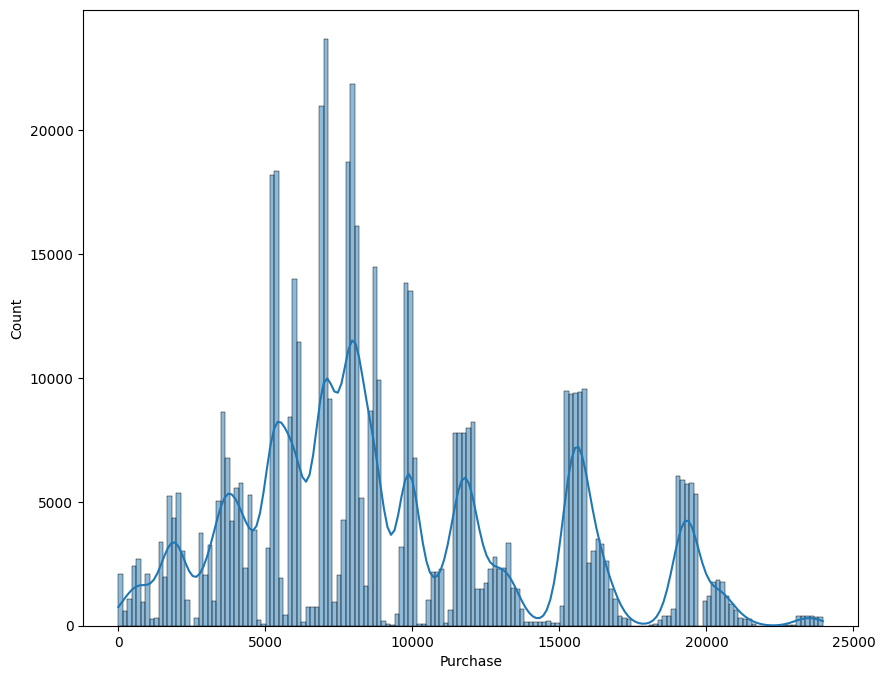

In [148]:
#Analysis of purchase amount
plt.figure(figsize=(10,8))
sns.histplot(x=df['Purchase'],kde=True)

<ipython-input-149-d0bb3fa4ea48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Product_Category',order=df['Product_Category'].value_counts().index,palette='hls')


<Axes: xlabel='Product_Category', ylabel='count'>

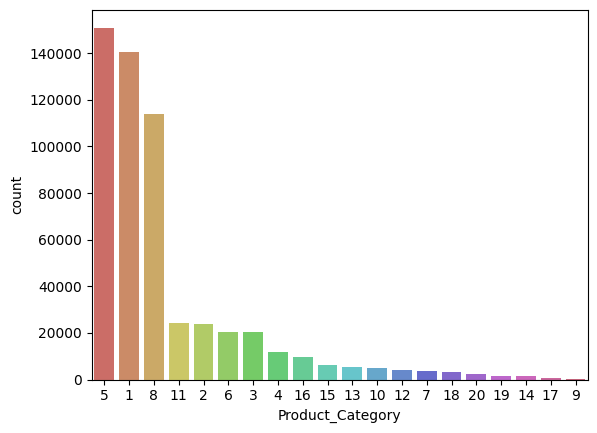

In [149]:
#product category analysis

sns.countplot(data=df,x='Product_Category',order=df['Product_Category'].value_counts().index,palette='hls')


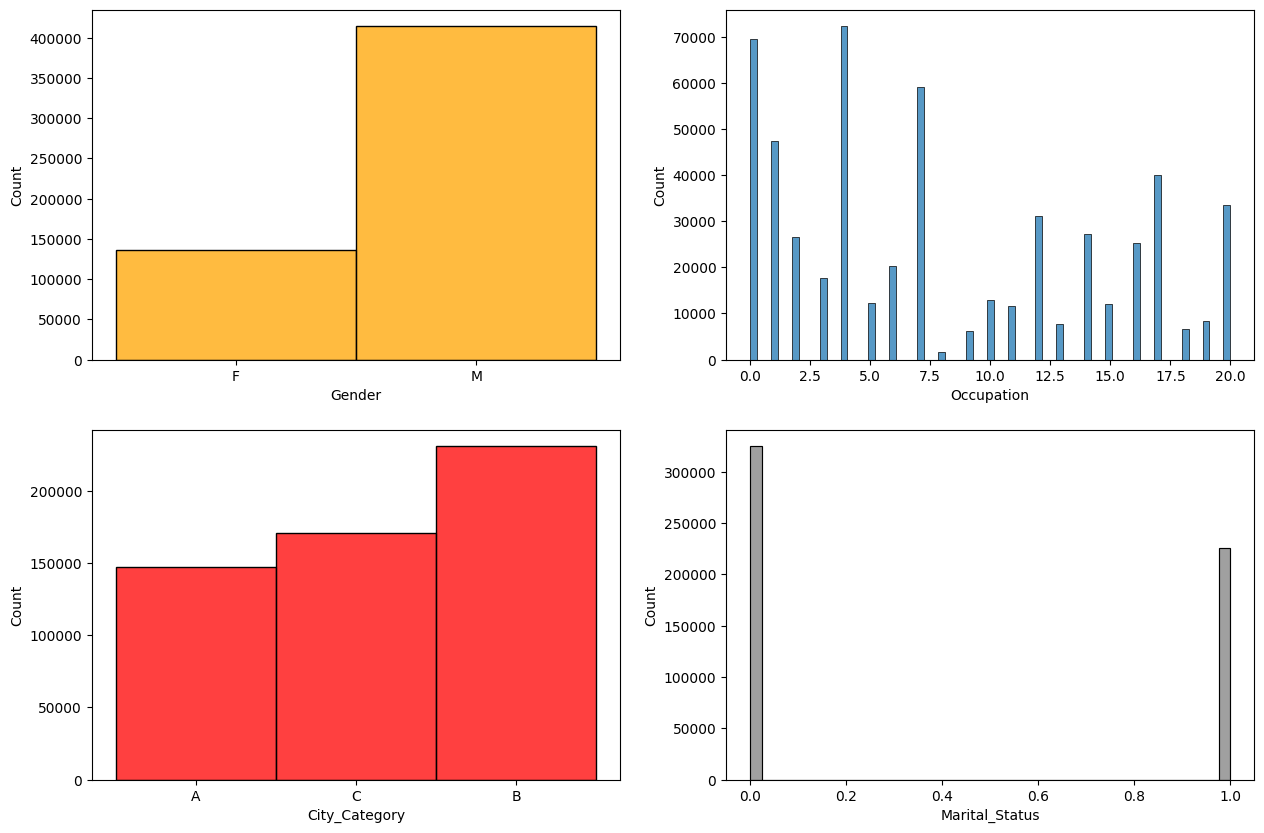

In [150]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.histplot(data=df, x='Gender', ax=axis[0,0],color = "orange")
sns.histplot(data=df, x='City_Category', ax=axis[1,0],color = 'Red')
sns.histplot(data=df, x='Occupation', ax=axis[0,1])
sns.histplot(data=df, x='Marital_Status',ax=axis[1,1],color = "grey")
plt.show()

#Insight :



*   Maximum purchase ranges from 5k to 15k
*   The Product category 5 is highely purchased and 1 and 8 also purchased moderately higher than other categories.
*   City category B is shwoing higher purchase than A and C
*   List item





# **For categorical variables outlier detections**
# **Bivariate**

<Axes: xlabel='Gender', ylabel='Purchase'>

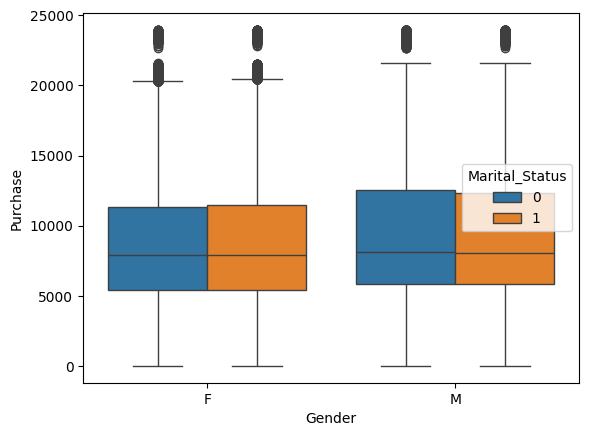

In [151]:
sns.boxplot(x=df['Gender'],hue=df['Marital_Status'],y=df['Purchase'])

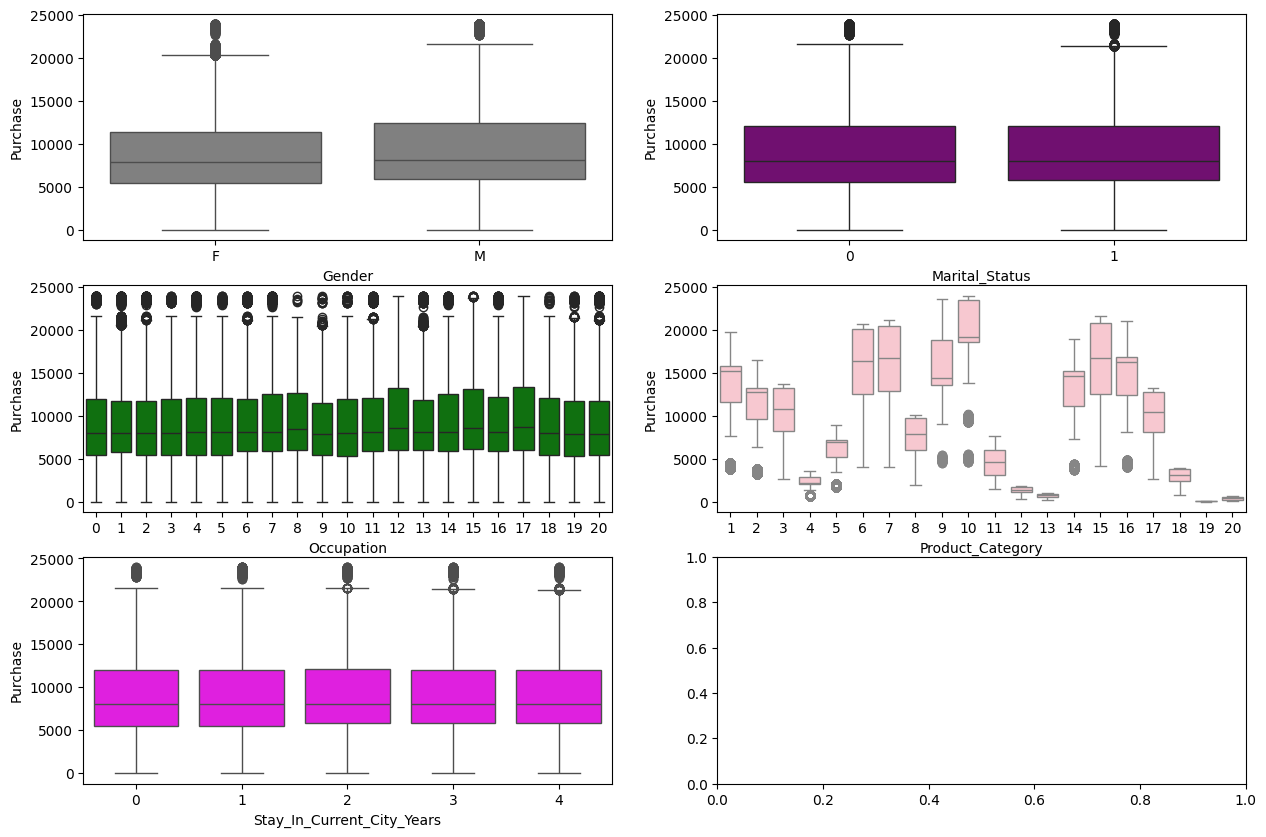

In [152]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

sns.boxplot(x=df['Gender'],y=df['Purchase'],ax=axis[0,0],color='Grey')
sns.boxplot(x=df['Marital_Status'],y=df['Purchase'],ax=axis[0,1],color='Purple')
sns.boxplot(x=df['Occupation'],y=df['Purchase'],ax=axis[1,0],color='Green')
sns.boxplot(x=df['Product_Category'],y=df['Purchase'],ax=axis[1,1],color='Pink')
sns.boxplot(x=df['Stay_In_Current_City_Years'],y=df['Purchase'],ax=axis[2,0],color='Magenta')
plt.show()

#**Insight**
1. From above boxplot it can be concluded that avarage prchase is between 6k to 12k for all Marital status , Gender and Stay in Current city years excep Product category with outliers
2. Median is almost same for all of them except Product category.
3. Female purchases have more outliers than male, like married one

In [153]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


# **Insight: **
Max Purchase amount is same for both Male and Female

#  **Find outliers count**

In [154]:
q1=np.percentile(df['Purchase'],25)
q3=np.percentile(df['Purchase'],75)
IQR = q3-q1

print(f"q1:{q1} \nq3:{q3} \nIQR:{IQR}\n\n ")


outliers = df["Purchase"][((df["Purchase"]<(q1-1.5*IQR)) | (df["Purchase"]>(q3+1.5*IQR)))]
print(f"outliers:{outliers}")
print("number of outliers: "+ str(len(outliers) ))
print("max outlier value:"+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

q1:5823.0 
q3:12054.0 
IQR:6231.0

 
outliers:343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64
number of outliers: 2677
max outlier value:23961
min outlier value: 21401


<Axes: xlabel='Gender', ylabel='Purchase'>

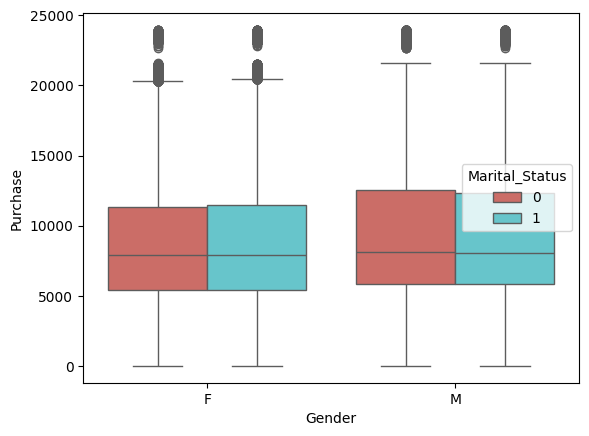

In [155]:
#1. Impact of geneder and Marital status on Purchase
sns.boxplot(data=df,
            x='Gender',
            y='Purchase',
            hue='Marital_Status',
            palette='hls')

# **Insight :  Both married and unmarried have almost same purchase behaviour with both Gender with average values and outliers.**
box plot is showing very overlapping distribution so we need to analyze it further with Central Limit Theorem

# **4. Are women spending more money per transaction than men? Why or  Why not?**

In [156]:
#As per sample data there are duplicates in it so we need to consider unique counts
unique_count=df.groupby('Gender')['User_ID'].nunique()
np.round(unique_count/unique_count.sum()*100,2)

,User_ID
Gender,
F,28.28
M,71.72


In [157]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [158]:
Male_sample_mean=9437.526040
Female_sample_mean=8734.565765

In [159]:
df_user_gender=df.groupby(['Gender','User_ID'])['Purchase'].describe()

df_user_gender

count          mean          std     min       25%      50%  \
Gender User_ID                                                                
F      1000001   35.0   9545.514286  4639.871552   612.0   7884.50   9946.0   
       1000006   47.0   8083.617021  4995.440232   480.0   3444.50   7879.0   
       1000010  223.0   9728.744395  4376.092644    24.0   6932.50   8824.0   
       1000011   70.0   7957.471429  4615.266625   121.0   5248.50   7054.5   
       1000016   22.0   6840.454545  4120.095361    62.0   4207.25   5459.5   
...               ...           ...          ...     ...       ...      ...   
M      1006030   59.0  12497.644068  5301.368141   743.0   7856.50  11727.0   
       1006032   55.0   9404.745455  5054.666697   473.0   6914.00   8771.0   
       1006033   36.0  13940.083333  4758.800385   368.0  11490.50  15356.0   
       1006034   12.0  16423.833333  6989.922523  2311.0  11754.50  19494.5   
       1006040  180.0   9184.994444  5242.108229   945.0   5922.50   7973.0   

                     75%      max  
Gender User_ID                     
F      1000001  12305.50  19219.0  
       1000006  11264.00  19538.0  
       1000010  12845.50  20957.0  
       1000011   9784.50  20175.0  
       1000016   8075.25  19657.0  
...                  ...      ...  
M      1006030  16327.50  23285.0  
       1006032  10966.50  23856.0  
       1006033  16546.25  19703.0  
       1006034  21249.00  23703.0  
       1006040  11733.25  23251.0  

[5891 rows x 8 columns]

In [160]:
#
df_user_gender.reset_index(inplace=True)
df_user_gender.sort_values(by='User_ID', ascending=False)
df_user_gender.groupby('Gender')['User_ID'].count()


,User_ID
Gender,
F,1666
M,4225


<Axes: xlabel='Purchase', ylabel='Count'>

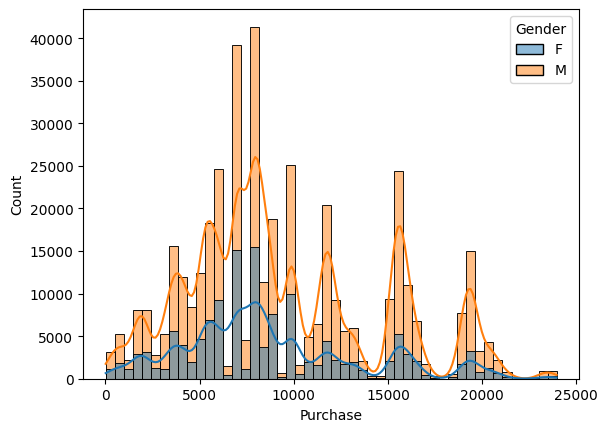

In [161]:

sns.histplot(data=df,
            hue='Gender',
            x='Purchase',
             bins=50,
             kde=True
            )

<Axes: xlabel='mean', ylabel='Count'>

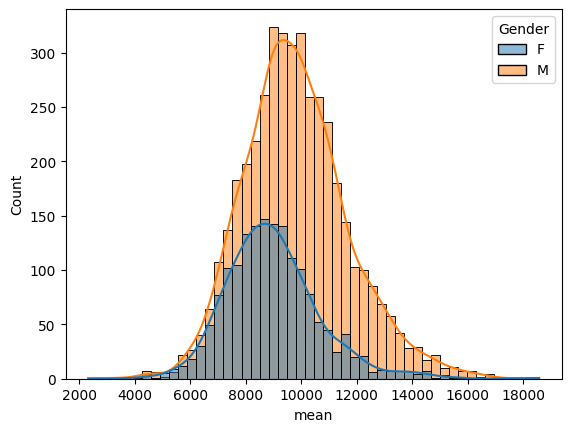

In [162]:
sns.histplot(data=df_user_gender,
            hue='Gender',
          x='mean',
             bins=50,
             kde=True
            )

# **Insight : The distribution of mean of purchases for Male and Female are overlapping , hence it states that eveb though there is a dioffrence in Male and Female count , howevere their average purchase amount is almost same.**

# **5. We need to analyze further by sampling it. Lets take sample of size:400,800,1600,3200,64000**

# **A. CTL: sample size=400**

In [163]:
df.groupby('Gender')['Purchase'].sample(400)

,Purchase
375948,10058
46787,7948
317912,1995
537840,8087
168758,15471
...,...
465680,9976
165664,9823
352446,2824
270689,8741


In [164]:
sample_size=400
iterations=10000

In [165]:
df_male=df[df['Gender'] == 'M']
male_spend=[]
for i in range(iterations):
  sample_mean=df_male['Purchase'].sample(sample_size).mean()
  male_spend.append(sample_mean)


In [166]:
df_female=df[df['Gender']=='F']
female_spend=[ df_female['Purchase'].sample(sample_size).mean() for i in range(iterations) ]


<Axes: ylabel='Count'>

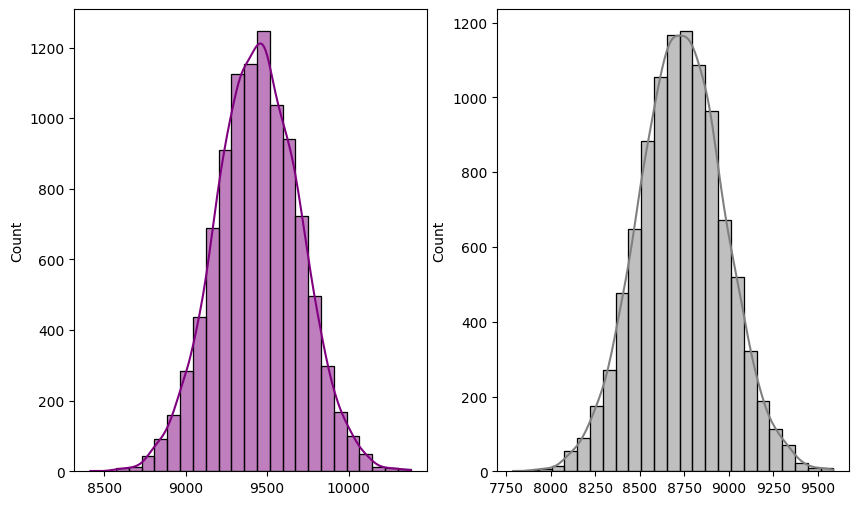

In [167]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

sns.histplot(
    x=male_spend,
    bins=25,
    ax=axis[0],
    color='Purple',
    kde=True
)

sns.histplot(
    x=female_spend,
    bins=25,
    ax=axis[1],
    color='Grey',
    kde=True

)

In [168]:
female_sample_mean=np.mean(female_spend)
print(f"female_sample_mean:{female_sample_mean}")

male_sample_mean=np.mean(male_spend)
print(f"male_sample_mean:{male_sample_mean}")

female_sample_mean:8733.96549225
male_sample_mean:9443.1460615


A.1. Calculate confidence inetrval at 95% confidence level

In [169]:
#percentile method : centered around median


print("male_spend")
print(np.percentile(male_spend, [2.5, 97.5]))
print("female_spend")
print(np.percentile(female_spend, [2.5, 97.5]))


male_spend
[8938.80825 9948.31   ]
female_spend
[8262.647875  9211.0394375]


This 95% confidence interval is still so much overlappinf to conclude male is higher or Female is higher we will look with Z score method as well

# **A.2. 95% confidence interval with Z score method**

In [170]:
#z score=


#min= mean - (95%)*std_err ..>std_mean_sample np.std(male_spends)
#max= mean + (95%)*std_err ..>std_mean_sample
from scipy.stats import norm
norm.ppf(0.95)

1.6448536269514722

In [171]:
z=1.64

In [172]:
#for male spends:
min_male_spend=male_sample_mean - 1.64 *np.std(male_spend)
max_male_spend=male_sample_mean + 1.64 *np.std(male_spend)

print(f"min and max values for MALE with 95% condence interval as from {min_male_spend} to {max_male_spend}")

min and max values for MALE with 95% condence interval as from 9022.385982595888 to 9863.906140404111


In [173]:
#for Female spends:
min_female_spend=female_sample_mean - 1.64 *np.std(female_spend)
max_female_spend=female_sample_mean + 1.64 *np.std(female_spend)

print(f"min and max values for FEMALE with 95% condence interval as from {min_female_spend} to {max_female_spend}")

min and max values for FEMALE with 95% condence interval as from 8338.30766916277 to 9129.623315337229


A. Conclusion : With sample size=400 we cannot say that male purchases are higher than female , we need to investigate is further with more sample size

# **B. CTL: sample size=800**

In [174]:
sample_size=800
iterations=1000

In [175]:
male_spend=[df_male['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
male_sample_mean=np.mean(male_spend)
female_spend=[df_female['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
female_sample_mean=np.mean(female_spend)

# **B.1. 95% confidence interval with Z score method**

In [176]:
#for male spends:
min_male_spend=male_sample_mean - 1.64 *np.std(male_spend)
max_male_spend=male_sample_mean + 1.64 *np.std(male_spend)
print(f"min and max values for MALE with 95% condence interval for sample size =800 is  from {min_male_spend} to {max_male_spend}")

min and max values for MALE with 95% condence interval for sample size =800 is  from 9141.41993882996 to 9727.29296367004


In [177]:
#for female spend
min_female_spend=female_sample_mean - 1.64 * np.std(female_spend)
max_female_spend=female_sample_mean + 1.64 * np.std(female_spend)
print(f"min and max values for FEMALE with 95% condence interval for sample size =800 is  from {min_female_spend} to {max_female_spend}")

min and max values for FEMALE with 95% condence interval for sample size =800 is  from 8454.66501743572 to 9010.514117564278


<Axes: ylabel='Count'>

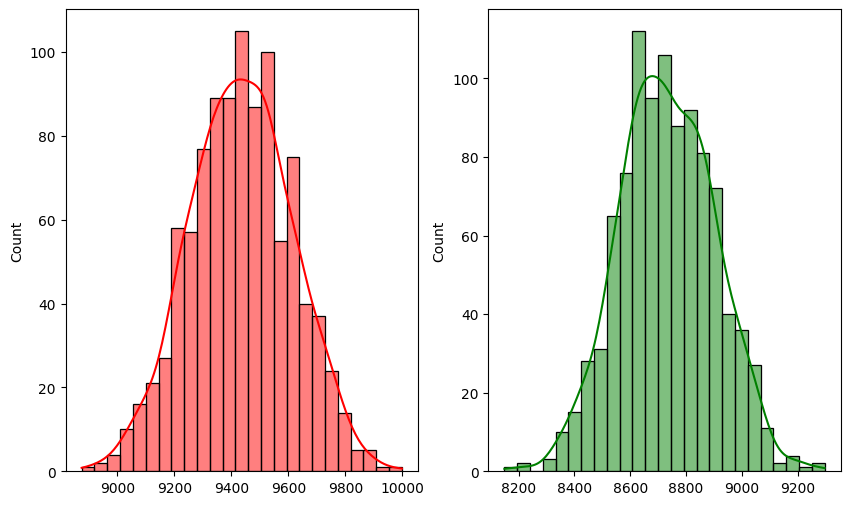

In [178]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

sns.histplot(
    x=male_spend,
    bins=25,
    ax=axis[0],
    color='Red',
    kde=True
)

sns.histplot(
    x=female_spend,
    bins=25,
    ax=axis[1],
    color='Green',
    kde=True

)

# **B. observation** : With sample siz=800 as well we cannot say that male purchases are higher than female , we need to investigate it further with more sample size

# **C. CTL: sample size=4000**

In [179]:
sample_size=4000
iterations=1000

In [180]:
male_spend=[ df_male['Purchase'].sample(sample_size).mean() for i in range(iterations)]
male_spend_mean=np.mean(male_spend)
female_spend=[df_female['Purchase'].sample(sample_size).mean() for i in range(iterations)]
female_spend_mean=np.mean(female_spend)

# **C.1. 95% confidence interval with Z score method**

In [181]:
#for male spends:
min_male_spend=male_sample_mean - 1.64 *np.std(male_spend)
max_male_spend=male_sample_mean + 1.64 *np.std(male_spend)
print(f"min and max values for MALE with 95% condence interval for sample size =4000 is  from {min_male_spend} to {max_male_spend}")

min and max values for MALE with 95% condence interval for sample size =4000 is  from 9303.324425976634 to 9565.388476523365


In [182]:
#for female spend
min_female_spend=female_sample_mean - 1.64 * np.std(female_spend)
max_female_spend=female_sample_mean + 1.64 * np.std(female_spend)
print(f"min and max values for FEMALE with 95% condence interval for sample size =4000 is  from {min_female_spend} to {max_female_spend}")

min and max values for FEMALE with 95% condence interval for sample size =4000 is  from 8611.908353775 to 8853.270781225


<Axes: ylabel='Count'>

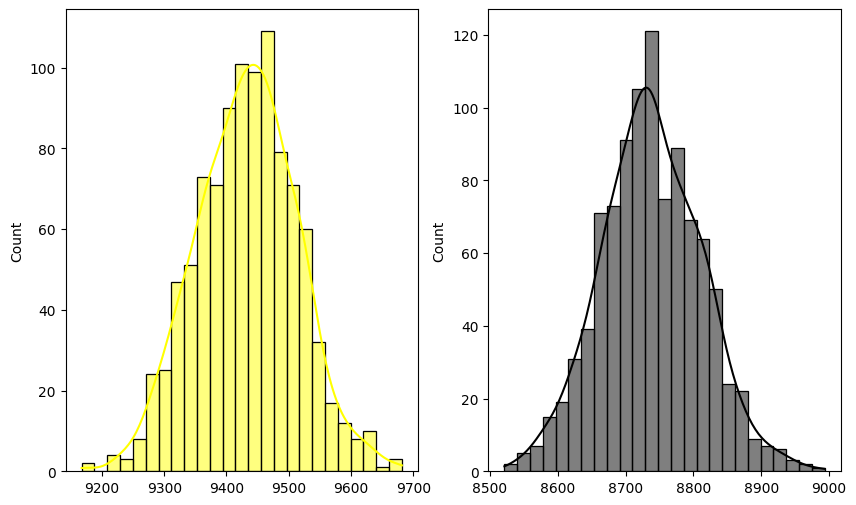

In [183]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

sns.histplot(
    x=male_spend,
    bins=25,
    ax=axis[0],
    color='yellow',
    kde=True
)

sns.histplot(
    x=female_spend,
    bins=25,
    ax=axis[1],
    color='black',
    kde=True

)

# **D. CTL: sample size=4000**

In [184]:
sample_size=10000
iterations=1000

In [185]:
male_spend=[ df_male['Purchase'].sample(sample_size).mean() for i in range(iterations)]
male_spend_mean=np.mean(male_spend)
female_spend=[df_female['Purchase'].sample(sample_size).mean() for i in range(iterations)]
female_spend_mean=np.mean(female_spend)

# **C.1. 95% confidence interval with Z score method**

In [186]:
#for male spends:
min_male_spend=male_sample_mean - 1.64 *np.std(male_spend)
max_male_spend=male_sample_mean + 1.64 *np.std(male_spend)
print(f"min and max values for MALE with 95% condence interval for sample size =10000 is  from {min_male_spend} to {max_male_spend}")

min and max values for MALE with 95% condence interval for sample size =10000 is  from 9353.49341338773 to 9515.219489112269


In [187]:
#for female spend
min_female_spend=female_sample_mean - 1.64 * np.std(female_spend)
max_female_spend=female_sample_mean + 1.64 * np.std(female_spend)
print(f"min and max values for FEMALE with 95% condence interval for sample size =10000 is  from {min_female_spend} to {max_female_spend}")

min and max values for FEMALE with 95% condence interval for sample size =10000 is  from 8658.190221722112 to 8806.988913277886


<Axes: ylabel='Count'>

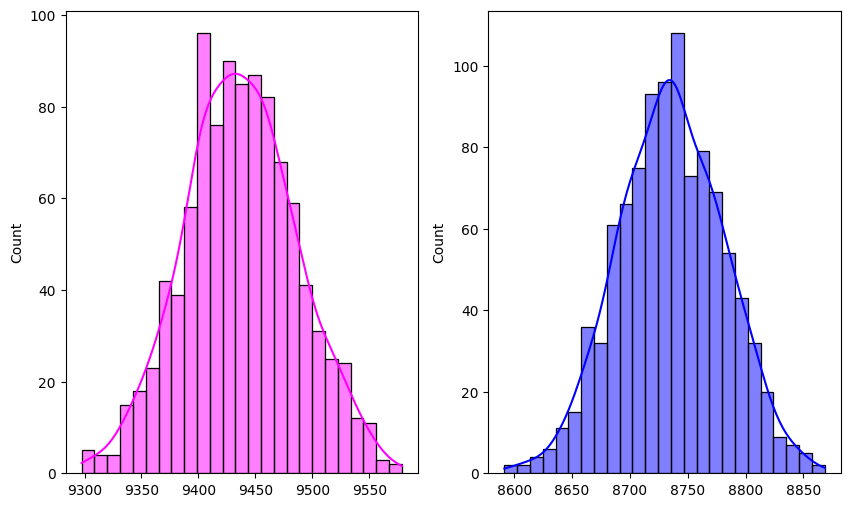

In [188]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

sns.histplot(
    x=male_spend,
    bins=25,
    ax=axis[0],
    color='magenta',
    kde=True
)

sns.histplot(
    x=female_spend,
    bins=25,
    ax=axis[1],
    color='Blue',
    kde=True

)

# **In nutshell now we can say that Male purchases are greater than Female , distrubution also looking narrows arount the 95% confidence interval, So walmart need to fucus more on the strategies to improve Female customers by applying discounts on female beautification related products,woman wear and all**

# ***Analysis on Different Age group ***

In [ ]:
df.groupby('Age')['User_ID'].nunique()

,User_ID
Age,
0-17,218
18-25,1069
26-35,2053
36-45,1167
46-50,531
51-55,481
55+,372


There is variability in customer counts across differnet age groups

In [ ]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [233]:
# Filter data for age groups 36-45 and 46-50
df_age_36_45 = df[df['Age'] == '36-45']
df_age_46_50 = df[df['Age'] == '46-50']

# Combine data from both age groups using concat
df_age_36_50 = pd.concat([df_age_36_45, df_age_46_50])


In [234]:
df_age_36_50.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
18,1000007,P00036842,M,36-45,1,B,1,1,1,11788
29,1000010,P00085942,F,36-45,1,B,4,1,2,16352
30,1000010,P00118742,F,36-45,1,B,4,1,5,8886
31,1000010,P00297942,F,36-45,1,B,4,1,8,5875
32,1000010,P00266842,F,36-45,1,B,4,1,5,8854


In [235]:
df_age_36_50['Age']=df_age_36_50['Age'].replace(['36-45','46-50'],'36-50')


In [236]:
df_age_36_50.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
18,1000007,P00036842,M,36-50,1,B,1,1,1,11788
29,1000010,P00085942,F,36-50,1,B,4,1,2,16352
30,1000010,P00118742,F,36-50,1,B,4,1,5,8886
31,1000010,P00297942,F,36-50,1,B,4,1,8,5875
32,1000010,P00266842,F,36-50,1,B,4,1,5,8854


In [237]:
df_age_36_50['Age'].value_counts()

,count
Age,
36-50,155714


In [238]:
# Filter data for age groups 51+
df_age_51_55 = df[df['Age'] == '51-55']
df_age_55_above = df[df['Age'] == '55+']

# Combine data from both age groups using concat
df_age_51_above= pd.concat([df_age_51_55, df_age_55_above])
df_age_51_above.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
15,1000006,P00190242,F,51-55,9,A,1,0,4,2079
16,1000006,P0096642,F,51-55,9,A,1,0,2,13055
17,1000006,P00058442,F,51-55,9,A,1,0,5,8851
67,1000017,P00019342,M,51-55,1,C,0,0,1,15872


In [240]:
df_age_51_above['Age']=df_age_51_above['Age'].replace(['51-55','55+'],'51+')

In [241]:
df_age_51_above.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
14,1000006,P00231342,F,51+,9,A,1,0,5,5378
15,1000006,P00190242,F,51+,9,A,1,0,4,2079
16,1000006,P0096642,F,51+,9,A,1,0,2,13055
17,1000006,P00058442,F,51+,9,A,1,0,5,8851
67,1000017,P00019342,M,51+,1,C,0,0,1,15872


In [242]:
df_age_51_above['Age'].value_counts()

,count
Age,
51+,60005


# **H. Age  CLT at sample_size=400**

In [243]:
sample_size=400
iterations=1000
#For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
df_age_0_17=df[df['Age'] == '0-17']
df_age_18_25=df[df['Age'] == '18-25']
df_age_26_35=df[df['Age'] == '26-35']


In [244]:
df['Age'].value_counts()


,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


<Axes: xlabel='Age', ylabel='Purchase'>

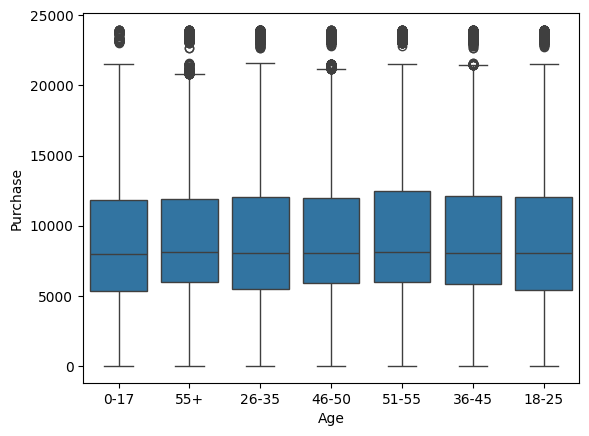

In [271]:
# prompt: Cross tab for age and purchase
sns.boxplot(
    data=df,
    y=df['Purchase'],
    x=df['Age']
)


In [245]:
df_age_36_50.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
18,1000007,P00036842,M,36-50,1,B,1,1,1,11788
29,1000010,P00085942,F,36-50,1,B,4,1,2,16352
30,1000010,P00118742,F,36-50,1,B,4,1,5,8886
31,1000010,P00297942,F,36-50,1,B,4,1,8,5875
32,1000010,P00266842,F,36-50,1,B,4,1,5,8854


In [246]:
age_0_17_spend=[df_age_0_17['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
age_0_17_sample_mean=np.mean(age_0_17_spend)
age_18_25_spend=[df_age_18_25['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
age_18_25_sample_mean=np.mean(age_18_25_spend)
age_26_35_spend=[df_age_26_35['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
age_26_35_sample_mean=np.mean(age_26_35_spend)
age_36_50_spend=[df_age_36_50['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
age_36_50_sample_mean=np.mean(age_36_50_spend)
age_51_above_spend=[df_age_51_above['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
age_51_above_sample_mean=np.mean(age_51_above_spend)
print(f"age_0_17_sample_mean:{age_0_17_sample_mean}")
print(f"age_18_25_sample_mean:{age_18_25_sample_mean}")
print(f"age_26_35_sample_mean:{age_26_35_sample_mean}")
print(f"age_36_50_sample_mean:{age_36_50_sample_mean}")
print(f"age_51_above_sample_mean:{age_51_above_sample_mean}")

age_0_17_sample_mean:8927.7967675
age_18_25_sample_mean:9166.765992499999
age_26_35_sample_mean:9253.312365
age_36_50_sample_mean:9303.224825
age_51_above_sample_mean:9466.98762


# **H.1. 95% confidence interval for different age group  at sample size=4000**

In [247]:
#for age group  0 17 spends:
min_age_0_17_spend=age_0_17_sample_mean - 1.64 *np.std(age_0_17_spend)
max_age_0_17_spend=age_0_17_sample_mean + 1.64 *np.std(age_0_17_spend)

print(f"min and max values for age group 0-17 with 95% condence interval as from {min_age_0_17_spend} to {max_age_0_17_spend}")
#for age group 18_25 spends:
min_age_18_25_spend=age_18_25_sample_mean - 1.64 *np.std(age_18_25_spend)
max_age_18_25_spend=age_18_25_sample_mean + 1.64 *np.std(age_18_25_spend)

print(f"min and max values for age group 18-25 with 95% condence interval as from {min_age_18_25_spend} to {max_age_18_25_spend}")


#for age group 26_35 spends:
min_age_26_35_spend=age_26_35_sample_mean - 1.64 *np.std(age_26_35_spend)
max_age_26_35_spend=age_26_35_sample_mean + 1.64 *np.std(age_26_35_spend)

print(f"min and max values for age group 26_35 with 95% condence interval as from {min_age_26_35_spend} to {max_age_26_35_spend}")

#for age group 36_50 spends:
min_age_36_50_spend=age_36_50_sample_mean - 1.64 *np.std(age_36_50_spend)
max_age_36_50_spend=age_36_50_sample_mean + 1.64 *np.std(age_36_50_spend)

print(f"min and max values for age group 36-50 with 95% condence interval as from {min_age_36_50_spend} to {max_age_36_50_spend}")

#for age group 51_above spends:
min_age_51_above_spend=age_51_above_sample_mean - 1.64 *np.std(age_51_above_spend)
max_age_51_above_spend=age_51_above_sample_mean + 1.64 *np.std(age_51_above_spend)

print(f"min and max values for age group 51 above with 95% condence interval as from {min_age_51_above_spend} to {max_age_51_above_spend}")


min and max values for age group 0-17 with 95% condence interval as from 8526.723232309114 to 9328.870302690886
min and max values for age group 18-25 with 95% condence interval as from 8752.122833883612 to 9581.409151116386
min and max values for age group 26_35 with 95% condence interval as from 8836.064755585749 to 9670.559974414251
min and max values for age group 36-50 with 95% condence interval as from 8897.27326685339 to 9709.176383146609
min and max values for age group 51 above with 95% condence interval as from 9057.294446716962 to 9876.680793283038


# **Based on all our analysis for behaviour of customers purchases on different age groups, it clearly states that there is no diffrence in it.**

# **I. Age  CLT at sample_size=10000**

In [250]:
sample_size=10000
iterations=1000


In [251]:
age_0_17_spend=[df_age_0_17['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
age_0_17_sample_mean=np.mean(age_0_17_spend)
age_18_25_spend=[df_age_18_25['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
age_18_25_sample_mean=np.mean(age_18_25_spend)
age_26_35_spend=[df_age_26_35['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
age_26_35_sample_mean=np.mean(age_26_35_spend)
age_36_50_spend=[df_age_36_50['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
age_36_50_sample_mean=np.mean(age_36_50_spend)
age_51_above_spend=[df_age_51_above['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
age_51_above_sample_mean=np.mean(age_51_above_spend)
print(f"age_0_17_sample_mean:{age_0_17_sample_mean}")
print(f"age_18_25_sample_mean:{age_18_25_sample_mean}")
print(f"age_26_35_sample_mean:{age_26_35_sample_mean}")
print(f"age_36_50_sample_mean:{age_36_50_sample_mean}")
print(f"age_51_above_sample_mean:{age_51_above_sample_mean}")

age_0_17_sample_mean:8934.2434525
age_18_25_sample_mean:9169.4081351
age_26_35_sample_mean:9253.088065400001
age_36_50_sample_mean:9292.717915
age_51_above_sample_mean:9462.9946572


# **I.1. 95% confidence interval for different age group  at sample size=10000**

In [253]:
#for age group  0 17 spends:
min_age_0_17_spend=age_0_17_sample_mean - 1.64 *np.std(age_0_17_spend)
max_age_0_17_spend=age_0_17_sample_mean + 1.64 *np.std(age_0_17_spend)

print(f"min and max values for age group 0-17 with 95% condence interval as from {min_age_0_17_spend} to {max_age_0_17_spend}")
#for age group 18_25 spends:
min_age_18_25_spend=age_18_25_sample_mean - 1.64 *np.std(age_18_25_spend)
max_age_18_25_spend=age_18_25_sample_mean + 1.64 *np.std(age_18_25_spend)

print(f"min and max values for age group 18-25 with 95% condence interval as from {min_age_18_25_spend} to {max_age_18_25_spend}")


#for age group 26_35 spends:
min_age_26_35_spend=age_26_35_sample_mean - 1.64 *np.std(age_26_35_spend)
max_age_26_35_spend=age_26_35_sample_mean + 1.64 *np.std(age_26_35_spend)

print(f"min and max values for age group 26_35 with 95% condence interval as from {min_age_26_35_spend} to {max_age_26_35_spend}")

#for age group 36_50 spends:
min_age_36_50_spend=age_36_50_sample_mean - 1.64 *np.std(age_36_50_spend)
max_age_36_50_spend=age_36_50_sample_mean + 1.64 *np.std(age_36_50_spend)

print(f"min and max values for age group 36-50 with 95% condence interval as from {min_age_36_50_spend} to {max_age_36_50_spend}")

#for age group 51_above spends:
min_age_51_above_spend=age_51_above_sample_mean - 1.64 *np.std(age_51_above_spend)
max_age_51_above_spend=age_51_above_sample_mean + 1.64 *np.std(age_51_above_spend)

print(f"min and max values for age group 51 above with 95% condence interval as from {min_age_51_above_spend} to {max_age_51_above_spend}")


min and max values for age group 0-17 with 95% condence interval as from 8883.908746861736 to 8984.578158138265
min and max values for age group 18-25 with 95% condence interval as from 9087.73877877981 to 9251.07749142019
min and max values for age group 26_35 with 95% condence interval as from 9172.024012253452 to 9334.15211854655
min and max values for age group 36-50 with 95% condence interval as from 9214.899607171004 to 9370.536222828994
min and max values for age group 51 above with 95% condence interval as from 9388.879525909468 to 9537.109788490534


# **We can conclude that,the analysis on behaviour of customers purchases for different age groups  shows that their 95% confidence interval are very overlapping except 0 to 17 age group and remaing age group .Walmart should luanch more product and disccount for 0 to 17 age group .**

In [254]:
df.groupby('Marital_Status')['User_ID'].nunique()

,User_ID
Marital_Status,
0,3417
1,2474


In [255]:
marital_count=df.groupby('Marital_Status')['User_ID'].nunique()
(marital_count/marital_count.sum())*100

,User_ID
Marital_Status,
0,58.003735
1,41.996265


# **As per count Unmarried customers are more than Married one here, lets check their behaviour on purchases**

In [256]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


Above statistics shows almost same values for all percentage , mean,min, max and standard deviation except count, this can be further analysed by sampling them and calculating confidence interval with CLT

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

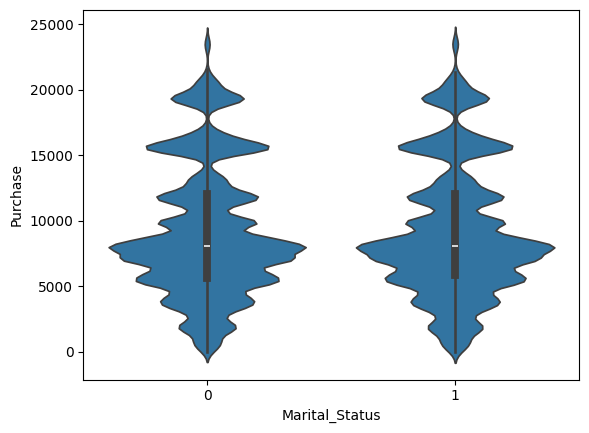

In [257]:
sns.violinplot(data=df,
               y=df['Purchase'],
               x=df['Marital_Status'])

It clearly states that there is no significant difference in purchas behaviour of Married and Unmarried customers.let's do analysis on CTL.

In [258]:
df_married=df[df['Marital_Status'] == 1]
df_unmarried=df[df['Marital_Status'] == 0]

# **E. Marital status CLT at sample_size=400**

In [259]:
sample_size=400
iterations=1000

In [260]:
married_spend=[df_married['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
married_sample_mean=np.mean(married_spend)
unmarried_spend=[df_unmarried['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
unmarried_sample_mean=np.mean(unmarried_spend)
print(f"married_sample_mean:{married_sample_mean}")
print(f"unmarried_sample_mean:{unmarried_sample_mean}")

married_sample_mean:9262.1509075
unmarried_sample_mean:9268.2101825


E.1. 95% confidence interval for Marital Status at sample size=400

In [261]:
#for married spends:
min_married_spend=married_sample_mean - 1.64 *np.std(married_spend)
max_married_spend=married_sample_mean + 1.64 *np.std(married_spend)

print(f"min and max values for MARRIED with 95% condence interval as from {min_married_spend} to {max_married_spend}")
#for unmarriede spends:
min_unmarried_spend=unmarried_sample_mean - 1.64 *np.std(unmarried_spend)
max_unmarried_spend=unmarried_sample_mean + 1.64 *np.std(unmarried_spend)

print(f"min and max values for unmarried with 95% condence interval as from {min_unmarried_spend} to {max_unmarried_spend}")

min and max values for MARRIED with 95% condence interval as from 8857.86716239042 to 9666.43465260958
min and max values for unmarried with 95% condence interval as from 8862.045013955265 to 9674.375351044737


# **Their result shows Unmarried and Married customer's purchase behaviour  are still overlapping , let's test this with more samples.**

# **F. Marital status CLT at sample_size=4000**

In [262]:
sample_size=4000
iterations=1000

In [263]:
married_spend=[df_married['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
married_sample_mean=np.mean(married_spend)
unmarried_spend=[df_unmarried['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
unmarried_sample_mean=np.mean(unmarried_spend)
print(f"married_sample_mean:{married_sample_mean}")
print(f"unmarried_sample_mean:{unmarried_sample_mean}")

married_sample_mean:9258.3334965
unmarried_sample_mean:9263.24612325


# **F.1. 95% confidence interval for Marital Status at sample size=4000**

In [264]:
#for married spends:
min_married_spend=married_sample_mean - 1.64 *np.std(married_spend)
max_married_spend=married_sample_mean + 1.64 *np.std(married_spend)

print(f"min and max values for MARRIED with 95% condence interval as from {min_married_spend} to {max_married_spend}")
#for unmarriede spends:
min_unmarried_spend=unmarried_sample_mean - 1.64 *np.std(unmarried_spend)
max_unmarried_spend=unmarried_sample_mean + 1.64 *np.std(unmarried_spend)

print(f"min and max values for unmarried with 95% condence interval as from {min_unmarried_spend} to {max_unmarried_spend}")

min and max values for MARRIED with 95% condence interval as from 9129.325078756667 to 9387.341914243332
min and max values for unmarried with 95% condence interval as from 9133.919684142411 to 9392.57256235759


d# **Still there is no differnce so need to do testing with increases sample size**

# **G. Marital status CLT at sample_size=10000**

In [265]:
sample_size=10000
iterations=1000

In [266]:
married_spend=[df_married['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
married_sample_mean=np.mean(married_spend)
unmarried_spend=[df_unmarried['Purchase'].sample(sample_size).mean()  for iter in range(iterations)]
unmarried_sample_mean=np.mean(unmarried_spend)
print(f"married_sample_mean:{married_sample_mean}")
print(f"unmarried_sample_mean:{unmarried_sample_mean}")

married_sample_mean:9262.464184699998
unmarried_sample_mean:9267.226560699999


# **G.1. 95% confidence interval for Marital Status at sample size=10000**

In [267]:
#for married spends:
min_married_spend=married_sample_mean - 1.64 *np.std(married_spend)
max_married_spend=married_sample_mean + 1.64 *np.std(married_spend)

print(f"min and max values for MARRIED with 95% condence interval as from {min_married_spend} to {max_married_spend}")
#for unmarriede spends:
min_unmarried_spend=unmarried_sample_mean - 1.64 *np.std(unmarried_spend)
max_unmarried_spend=unmarried_sample_mean + 1.64 *np.std(unmarried_spend)

print(f"min and max values for unmarried with 95% condence interval as from {min_unmarried_spend} to {max_unmarried_spend}")

min and max values for MARRIED with 95% condence interval as from 9180.774236886413 to 9344.154132513584
min and max values for unmarried with 95% condence interval as from 9185.332163868408 to 9349.12095753159


# **Based on all our analysis for behaviour of customers on Marital Status , it clearly states that there is no diffrence in it so walmart need to promote some offers to unmarried one so that they can do more shoppings as higher count of unmarried one are contributing same as lower count of married one.**

Final Insight :

1. Walmart should promote female buyers with some offer and promistions
2. Walmart can add some educational and games products to encourage 0 to 17 age group customers to do more shopping.
3. Single customers should be offered with grwear discounts to promote more purchases.
